<a href="https://colab.research.google.com/github/DionesGouvea/propensao_compra/blob/main/Propens%C3%A3o_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Contexto**
Uma empresa bem estabelecida operando no setor de alimentos e varejo que atende quase um milhão de consumidores por ano, por meio de 3 canais de venda: loja física, catálogos e site da empresa, notou que apesar de ter tido receitas sólidas nos últimos 3 anos as perspectivas de crescimento do lucro para os próximos anos não são promissoras. Por esse motivo, várias iniciativas estratégicas estão sendo consideradas para reverter essa situação. Uma delas é melhorar o desempenho das atividades de marketing, com foco especial em campanhas de marketing.

##**Problema de negócio**
As perspectivas de crescimento do lucro para os próximos anos não são promissoras, com o objetivo de mudar este cenário a equipe de marketing foi pressionada a gastar seu orçamento anual com mais sabedoria, o caminho escolhido foi construir um modelo que preveja o comportamento do cliente (comprador) de forma que eles consigam escolher a dedo os clientes mais propensos a comprar a oferta.  

###**Objetivos**
  - Com base em dados de uma campanha piloto, quais clientes têm maior propensão para adquirir um produto em uma nova campanha? 
  - Além disso, o CMO está interessado em entender e estudar as características dos clientes que estão dispostos a comprar o produto.


##Dados 
Os dados são sobre uma campanha piloto de uma empresa varejista onde 2.240 clientes  foram contatados. Os dados contêm recursos sociodemográficos,  além disso, ele contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.

###Variaveis

**AcceptedCmp(1~5)** - se o cliente aceitou a oferta na (1 ~ 5) camapanha (1 sim / 0 não)

**Response(target)** - Se o cliente aceitou a oferta na ultima campanha (1 sim / 0 não)

**Complain** - Se o cliente reclamou nos ultimos 2 anos 

**DtCustomer** - Data de inscrição do cliente na empresa

**Education** - Nivel de educação do cliente 

**Maritial** - Estado civil do cliente 

**KidHome** - numero de crianças na casa do cliente 

**TeenHome** - numero de adolescentes na casa do cliente 

**Income** - Renda familiar do Cliente 

**MntFishProducts** - Quantia gasta em produtos de peixe nos ultimos 2 anos 

**MntmeatProducts** - Quantia gasta em produtos de carne nos ultimos 2 anos 

**MntFruitsProducts** - Quantia gasta em produtos de frutas nos ultimos 2 anos 

**MntsweetProducts** - Quantia gasta em produtos de doces nos ultimos 2 anos 

**MntWineProducts** - Quantia gasta em produtos de vinhos nos ultimos 2 anos 

**MntGoldProducts** - Quantia gasta em produtos de Ouro nos ultimos 2 anos 

**NumDealsPurchases** - numero de compras feitas com desconto 

**NumCatalogPurchases** - numero de compras feitas usando o catalogo 

**NumStorePurchases** - numero de compras feitas diretamente na loja

**NumWebPurchases** = Numero de compras feitas pelo web site. 

**NumWebVisitsMonth** - Numero de visitas feitas no site no ultimo mes 

**Recency** - Numero de dias desde a ultima compra 



## Importando Bibliotecas

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [190]:
df = pd.read_csv('/content/ml_project1_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Pre-Processamento para Analise exploratoria

In [191]:
from sklearn.model_selection import train_test_split


X = df.drop('Response', axis = 1)
y = df.Response

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2806)

df_train = pd.concat([X_train,y_train], axis = 1)

In [192]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 2054 to 1329
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1568 non-null   int64  
 1   Year_Birth           1568 non-null   int64  
 2   Education            1568 non-null   object 
 3   Marital_Status       1568 non-null   object 
 4   Income               1553 non-null   float64
 5   Kidhome              1568 non-null   int64  
 6   Teenhome             1568 non-null   int64  
 7   Dt_Customer          1568 non-null   object 
 8   Recency              1568 non-null   int64  
 9   MntWines             1568 non-null   int64  
 10  MntFruits            1568 non-null   int64  
 11  MntMeatProducts      1568 non-null   int64  
 12  MntFishProducts      1568 non-null   int64  
 13  MntSweetProducts     1568 non-null   int64  
 14  MntGoldProds         1568 non-null   int64  
 15  NumDealsPurchases    1568 non-null 

In [193]:
df_train.describe(percentiles = [0.10, 0.25,0.5,0.75,0.99])

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1568.000000,1568.000000,1553.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.0,1568.0,1568.000000
mean,5575.101403,1968.730230,52582.884739,0.436224,0.514668,49.320791,311.213010,26.581633,168.948342,38.117985,...,5.341837,0.072704,0.077168,0.074617,0.066327,0.014668,0.008929,3.0,11.0,0.154337
std,3253.672370,12.091253,26383.798056,0.534468,0.546301,28.714887,339.708222,39.749258,224.406065,55.459438,...,2.460768,0.259733,0.266944,0.262857,0.248931,0.120260,0.094098,0.0,0.0,0.361386
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
10%,1085.200000,1952.000000,24342.200000,0.000000,0.000000,10.000000,6.000000,0.000000,7.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2824.500000,1959.000000,35860.000000,0.000000,0.000000,25.000000,26.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5363.000000,1970.000000,51983.000000,0.000000,0.000000,50.000000,184.000000,8.000000,68.500000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8534.750000,1977.000000,69016.000000,1.000000,1.000000,74.000000,507.000000,33.250000,239.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
99%,11074.330000,1992.000000,94075.120000,2.000000,2.000000,98.000000,1291.300000,172.000000,915.000000,226.320000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.0,11.0,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,258.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [194]:
#trunkando a variavel income em 99%
df_train.Income = np.where(df_train.Income > 94076.00, 94076.00, df_train.Income)

# Transforma a coluna Dt_Customer em um objeto datetime
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

In [195]:
# Criando uma feature que diz a idade do cliente
df_train["Age"] = 2015 - df_train["Year_Birth"]
#trunkando a variavel Age 
df_train.Age = np.where(df_train.Age > 100, 100, df_train.Age)

In [196]:
# Criando uma nova coluna chamada 'TotalComprou' baseada nas campanhas anteriores 
df_train['TotalComprou'] = df_train[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


Para uma melhor visualização das features acima eu dei os devidos tratamentos. 

## Analise Exploratoria

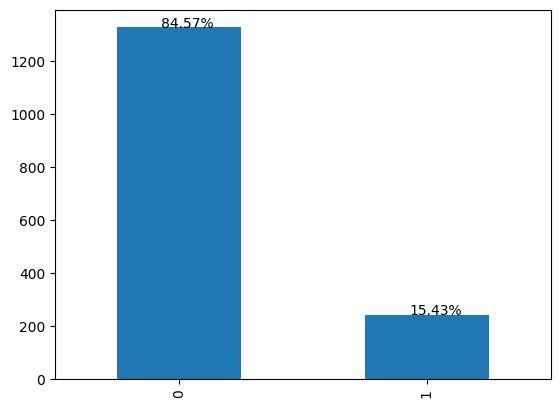

In [197]:
#visualizando a distribuição da variavel target 
ax = df_train.Response.value_counts().plot(kind='bar')
for p in ax.patches: # patches pega as colunas 
  #multiplicando o tamanho da coluna por 100 e dividindo pelo tamanho da variavel target
  ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_train.Response)), (p.get_x()+ 0.18, p.get_height()))

É possivel perceber que o conjunto de treinamento segue a distribuiçao descrita no contexto do problema apenas 15% dos clientes compraram o produto 

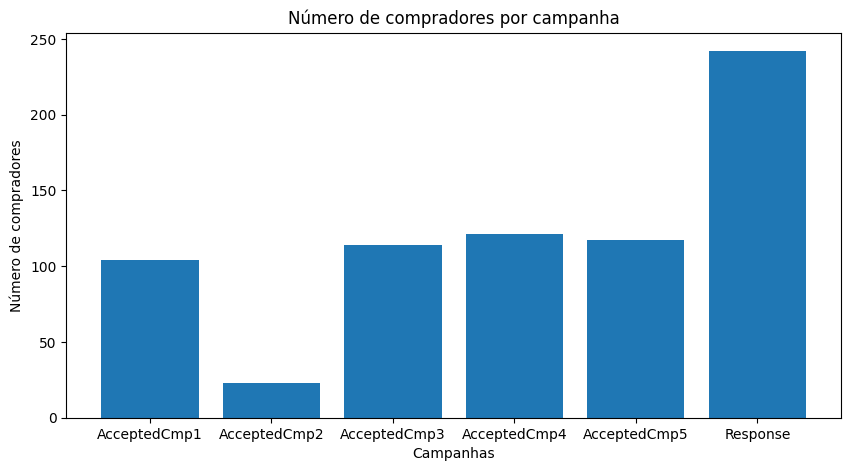

In [198]:
# selecionando as colunas de campanha.
df_cmp = df_train[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']]
# calculando o número de compradores para cada campanha (somando os 1)
compraram = df_cmp.sum()

#plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(compraram.index, compraram)
ax.set_xlabel("Campanhas")
ax.set_ylabel("Número de compradores")
ax.set_title("Número de compradores por campanha")
plt.show()


A segunda camapanha teve desempenho muito inferior as demais camapanhas, visualizar

Text(0.5, 1.0, 'Distribuição da renda por nível de educação dos clientes com relação à campanhas anteriores')

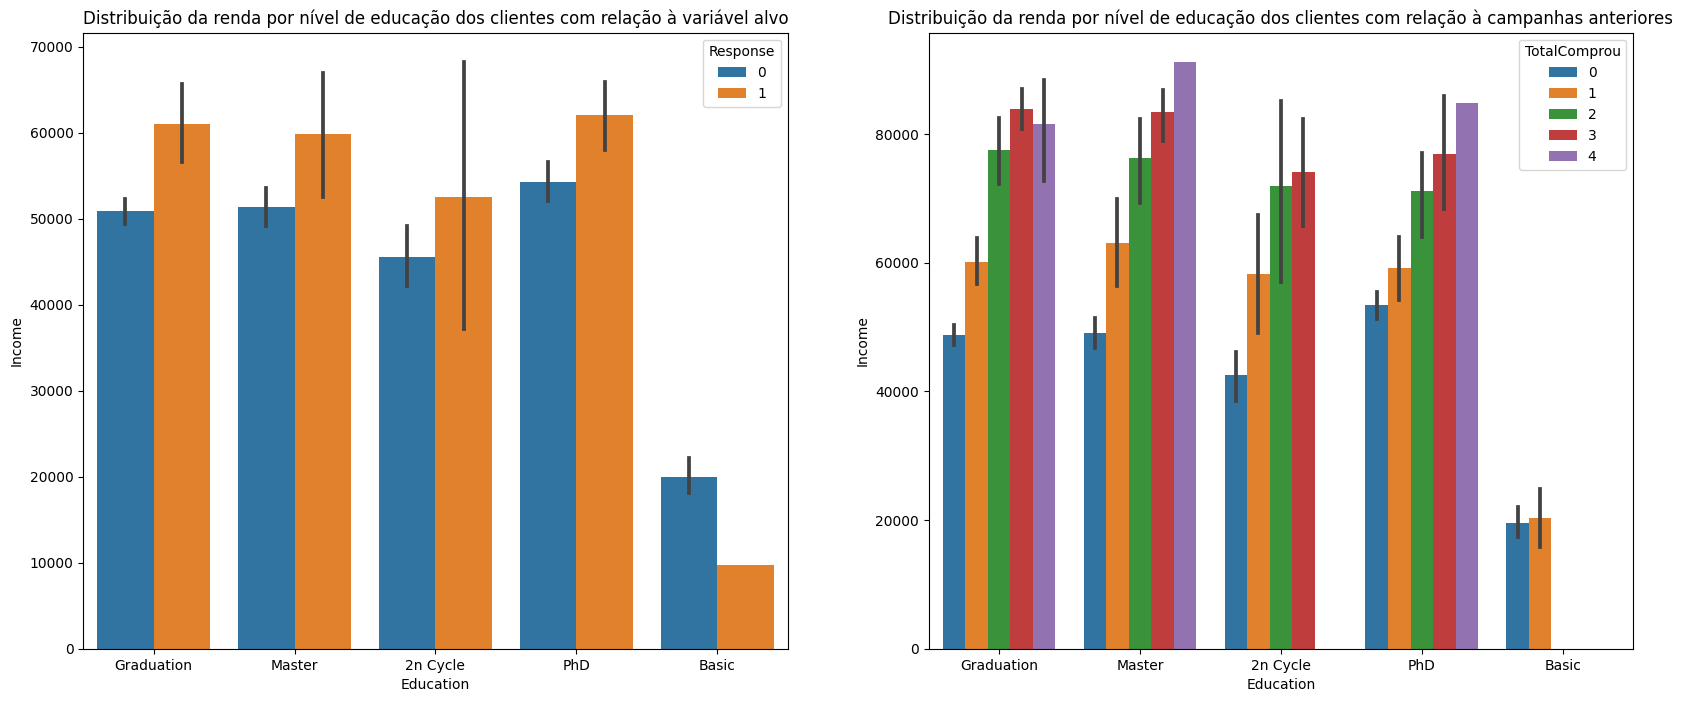

In [199]:
#verificando se o nivel de escolaridade influencia na obtenção do produto. 
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data=df_train, x='Education', y='Income', hue='Response')
plt.title('Distribuição da renda por nível de educação dos clientes com relação à variável alvo')

plt.subplot(1,2,2)
sns.barplot(data=df_train, x='Education', y='Income', hue='TotalComprou')
plt.title('Distribuição da renda por nível de educação dos clientes com relação à campanhas anteriores')

Os clientes que adquiriram o produto apresentam um nível de escolaridade ligeiramente superior em comparação aos clientes que não adquiriram. No entanto, essa diferença não é muito significativa.

In [200]:
#visualizando a compra do produto na campanha de marketing (target)
#Mnt = pd.DataFrame(df_train, columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Response'])
#sns.pairplot(Mnt, hue='Response',markers=["o", "s"],height=1.7, aspect=1.5)

Não existe uma correlação muito espressiva entre os produtos oferecidos, é possivel perceber que existe alguns outliers e que a grande maioria das pessoas que adquiriram o novo produto pela ultima campanha de marketing(target), ja fizeram muitas compras de algum outro produto.

In [201]:
#visualizando as compras do produto em campanhas de marketing anteriores. 
#Mnt = pd.DataFrame(df_train, columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','TotalComprou'])
#sns.pairplot(Mnt, hue='TotalComprou',height=1.7, aspect=1.5)

Fica mais nitido visualizar que os clientes que adquiriram o produto da campanha de marketing são clientes que ja compram algum produto com frequencia. 

Text(0, 0.5, 'N de Clientes que adquiriu o produto')

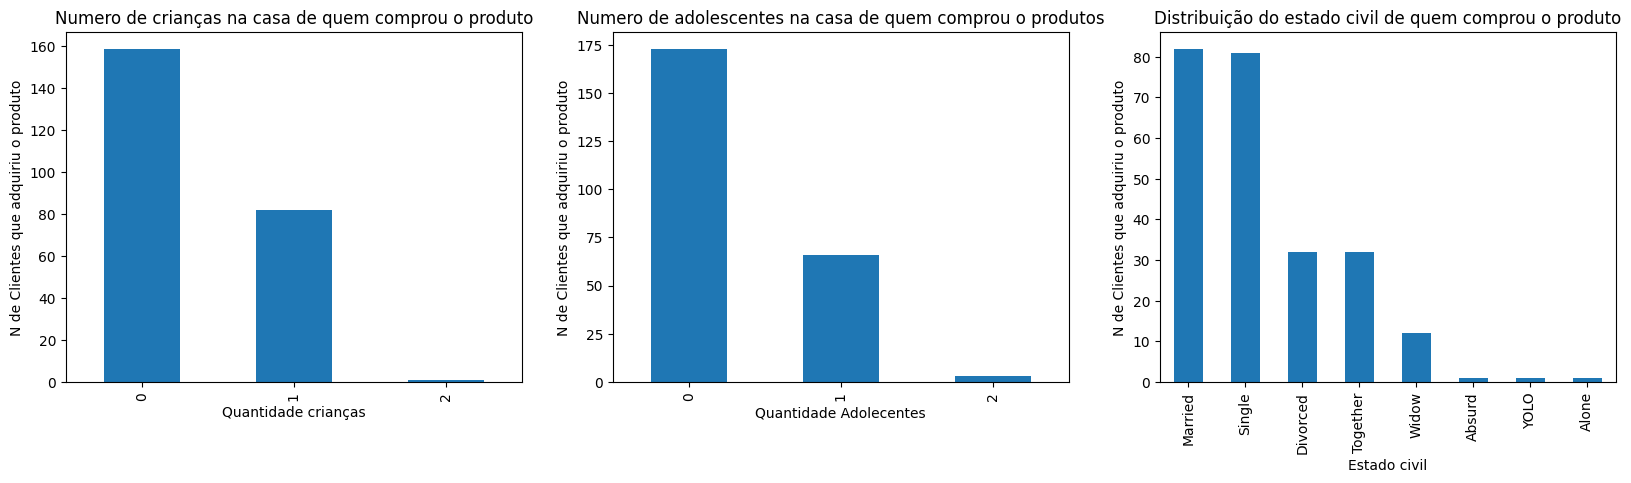

In [202]:
#plotando se existe diferença na quantidade de produtos adquiridos por pessoas que possuem filhos e por estado civil
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
df_train[df_train.Response == 1]['Kidhome'].value_counts().plot(kind='bar')
plt.title('Numero de crianças na casa de quem comprou o produto')
plt.xlabel('Quantidade crianças')
plt.ylabel('N de Clientes que adquiriu o produto')

plt.subplot(2,3,2)
df_train[df_train.Response == 1]['Teenhome'].value_counts().plot(kind='bar')
plt.title('Numero de adolescentes na casa de quem comprou o produtos')
plt.xlabel('Quantidade Adolecentes')
plt.ylabel('N de Clientes que adquiriu o produto')

plt.subplot(2,3,3)
df_train[df_train.Response == 1]['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Distribuição do estado civil de quem comprou o produto')
plt.xlabel('Estado civil')
plt.ylabel('N de Clientes que adquiriu o produto')


é possivel perceber que possuir filhos sejam eles crinças ou adolescente pode influenciar na aquisição do produto, ja o estado civil não parece ter alguma influencia. 

<Axes: xlabel='TotalComprou', ylabel='Income'>

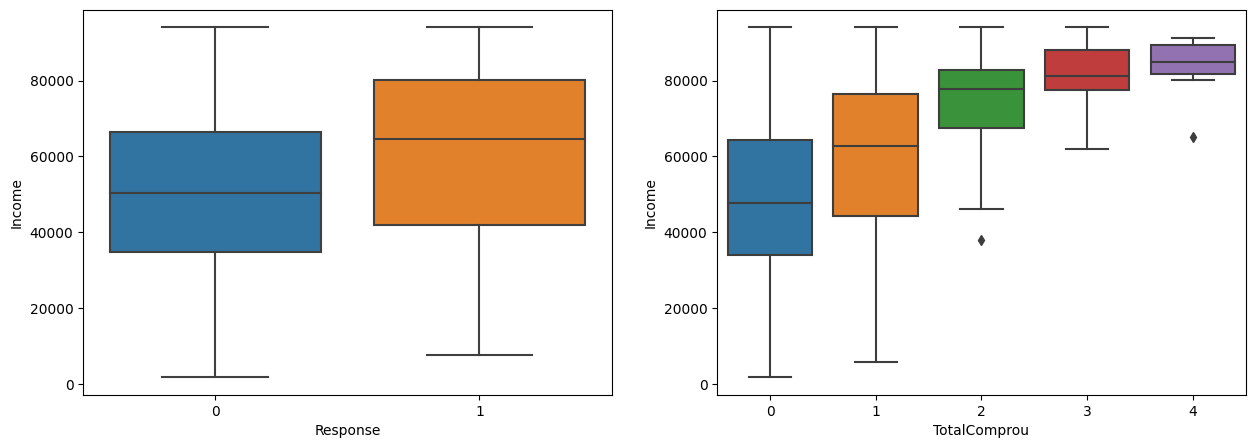

In [203]:
#verificando se existe diferença em quem adquiriu o produto e quem não adquiriu pelo valor da renda. 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x="Response", y="Income", data=df_train)
plt.subplot(1,2,2)
sns.boxplot(x="TotalComprou", y="Income", data=df_train)

E possivel perceber que ter uma renda maior influencia se o cliente ira adquirir o produto. 

<Axes: xlabel='Income', ylabel='MntGoldProds'>

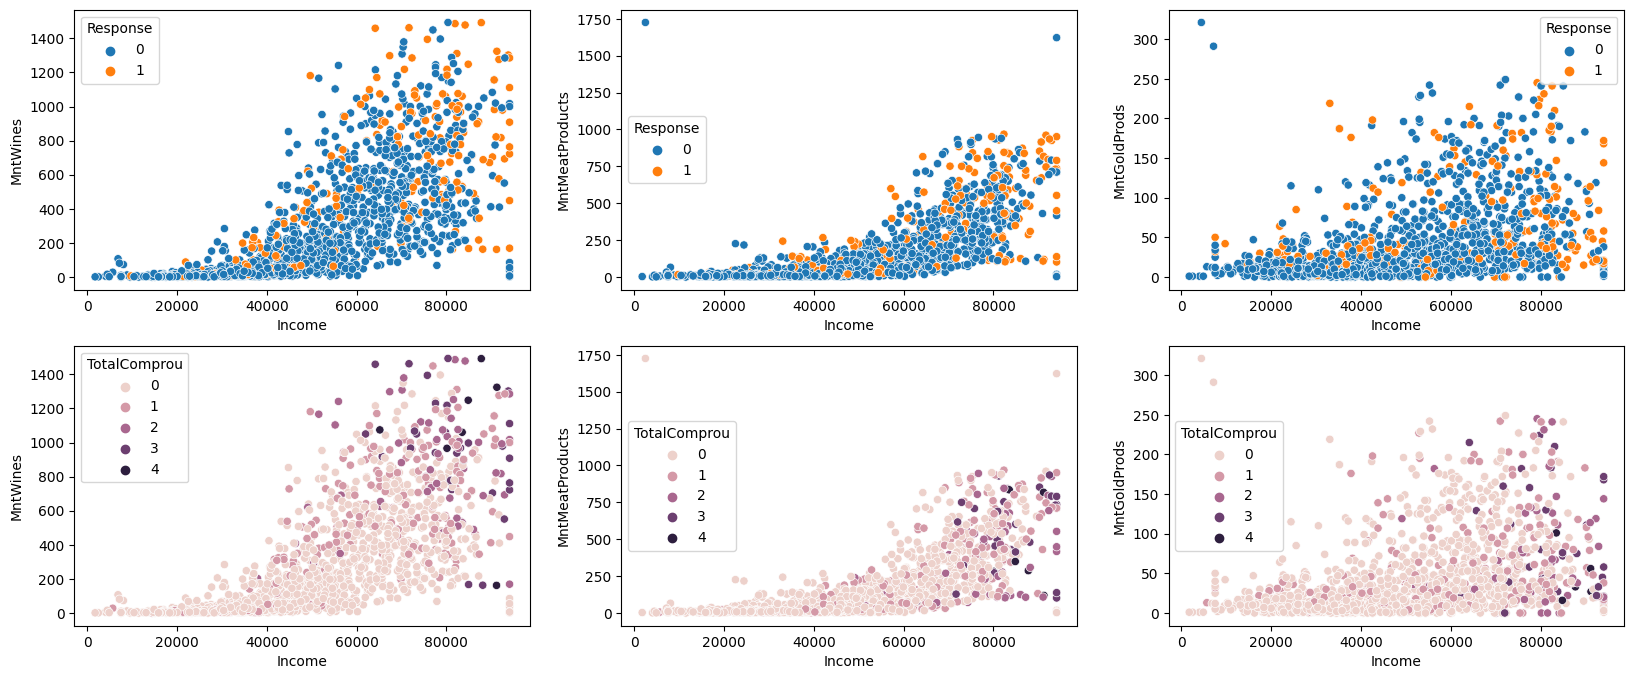

In [204]:
#verificando a relação de alguns produtos com a renda e onde estão os clientes que adquiriram o produto da campanha de marketing
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.scatterplot(x='Income', y='MntWines', hue='Response', data=df_train)

plt.subplot(2,3,2)
sns.scatterplot(x='Income', y='MntMeatProducts', hue='Response', data=df_train)

plt.subplot(2,3,3)
sns.scatterplot(x='Income', y='MntGoldProds', hue='Response', data=df_train)

plt.subplot(2,3,4)
sns.scatterplot(x='Income', y='MntWines', hue='TotalComprou', data=df_train)

plt.subplot(2,3,5)
sns.scatterplot(x='Income', y='MntMeatProducts', hue='TotalComprou', data=df_train)

plt.subplot(2,3,6)
sns.scatterplot(x='Income', y='MntGoldProds', hue='TotalComprou', data=df_train)

é possivel perceber que os clientes que possuem mais renda adquirem mais produtos, e respondem mais as campanhas de marketing. 

Text(0, 0.5, 'Numero de visitas no site')

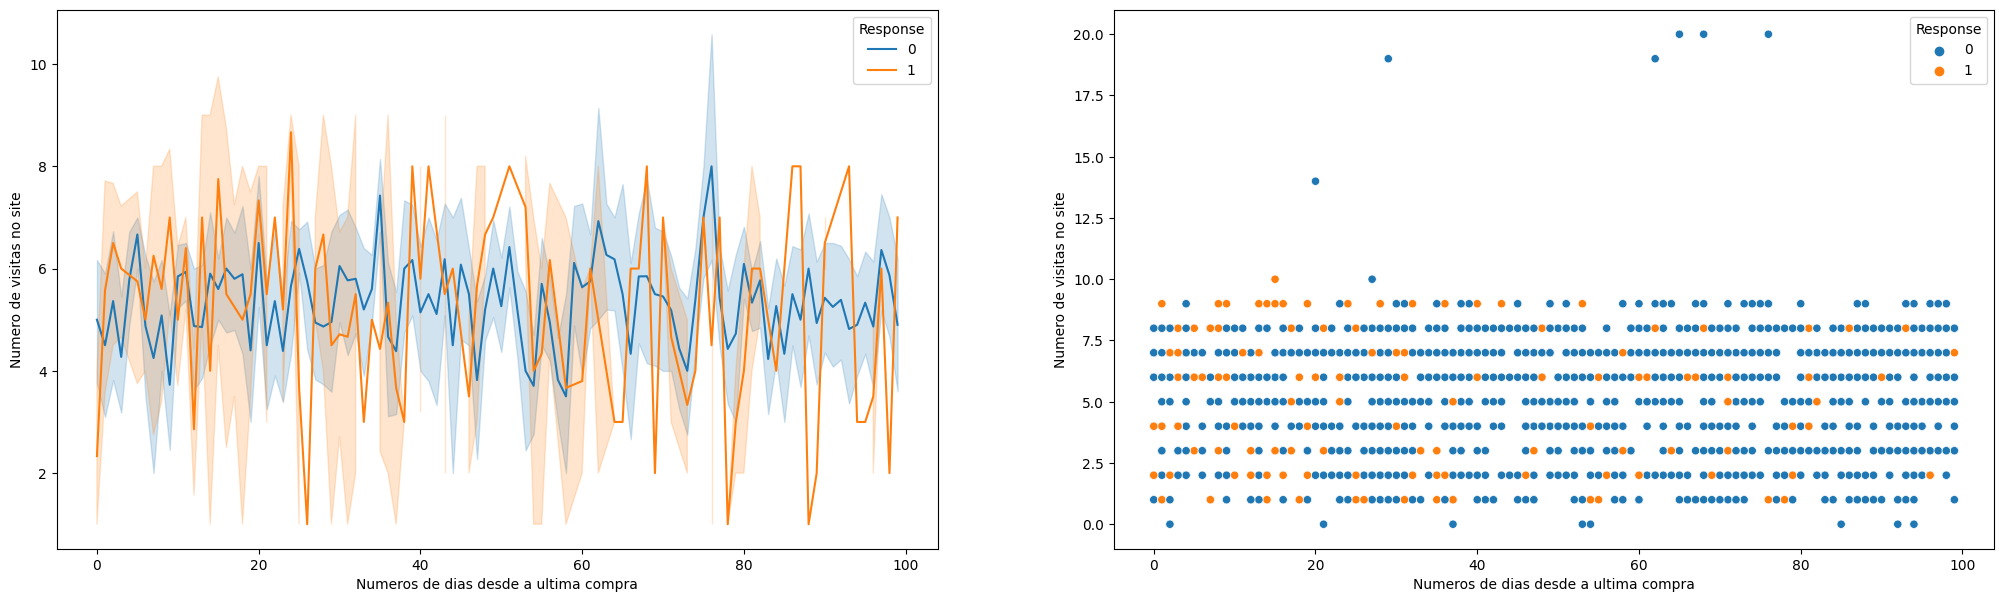

In [205]:
#vendo o numero de visitas no site desde a ultima compra e comparando com quem adquiriu o produto

# Criando um dataframe com as features NumWebVisitsMonth, Recency e Response
df_lineplot = df_train[['NumWebVisitsMonth', 'Recency', 'Response']]

# Plotando o line plot
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.lineplot(data=df_train, x='Recency', y='NumWebVisitsMonth', hue='Response')
plt.xlabel('Numeros de dias desde a ultima compra')
plt.ylabel('Numero de visitas no site')


plt.subplot(1,2,2)
sns.scatterplot(data=df_train, x='Recency', y='NumWebVisitsMonth', hue='Response')
plt.xlabel('Numeros de dias desde a ultima compra')
plt.ylabel('Numero de visitas no site')


aparentemente os clientes que adquiriram o produto da campanha de marketing tem o habito ligeiramente maior de visitar o site e a data de visita desde a ultima compra em sua maioria é inferior a 30 dias. 

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

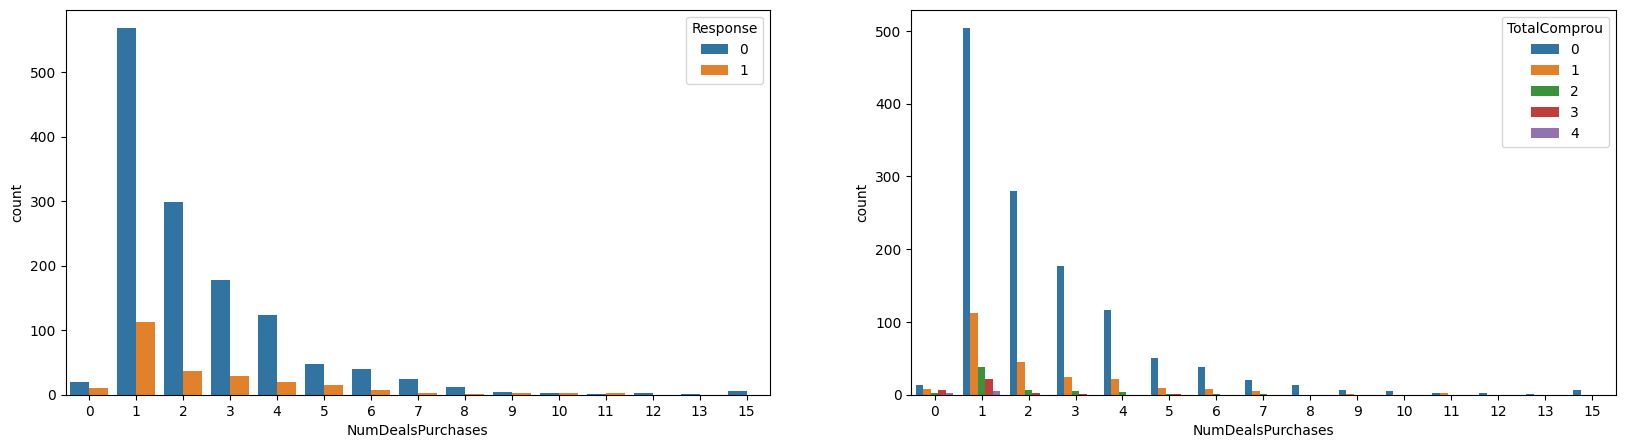

In [206]:
#visualizando o numero de compras feita com desconto com o fato de ter adquirido o produto 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='NumDealsPurchases', hue='Response', data=df_train)
plt.subplot(1,2,2)
sns.countplot(x='NumDealsPurchases', hue='TotalComprou', data=df_train)

Aparentemente o cliente ter comprado mais produtos com desconto não o faz ser mais responsivo a campanha do novo produto. 

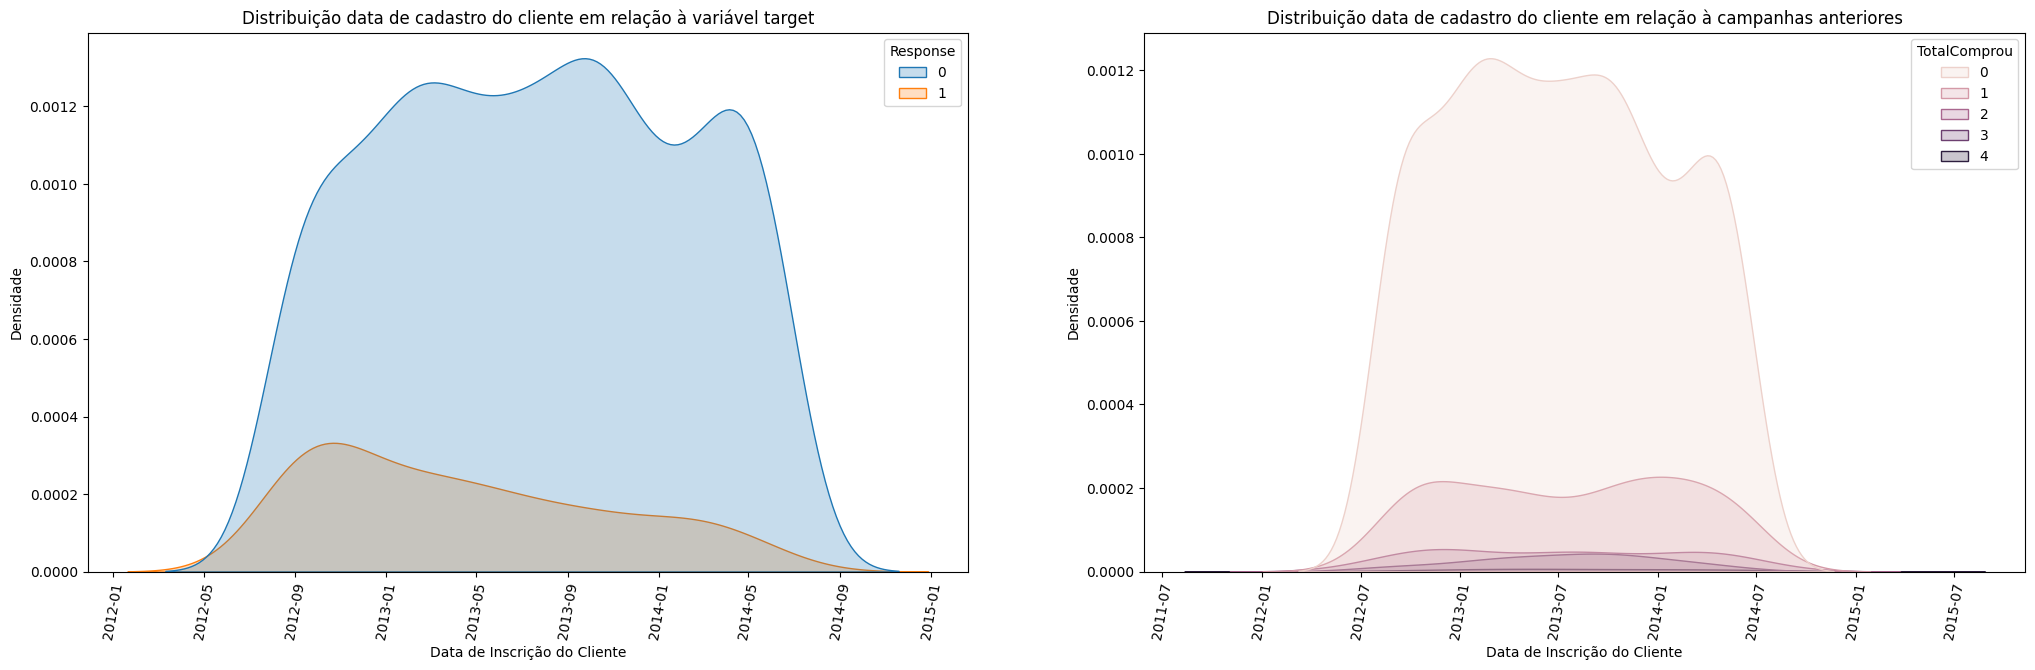

In [207]:
#"Distribuição data de cadastro do cliente em relação à campanhas
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.kdeplot(data=df_train, x="Dt_Customer", hue="Response", fill=True)
plt.title("Distribuição data de cadastro do cliente em relação à variável target")
plt.xlabel("Data de Inscrição do Cliente")
plt.ylabel("Densidade")
plt.xticks(rotation =80)

plt.subplot(1,2,2)
sns.kdeplot(data=df_train, x="Dt_Customer", hue="TotalComprou", fill=True)
plt.title("Distribuição data de cadastro do cliente em relação à campanhas anteriores")
plt.xlabel("Data de Inscrição do Cliente")
plt.ylabel("Densidade")
plt.xticks(rotation =80)
plt.show()

Quando eu olho para minha variavel target, aparentemente os clientes que responderam a campanha tendem a ser clientes mais antigos e quanto mais novo o cliente menor a chance dele responder a campanha de marketing. 
Quando eu olho as pessoas que responderam as campanhas anteriores existe essa relação porem ela e menos evidente.

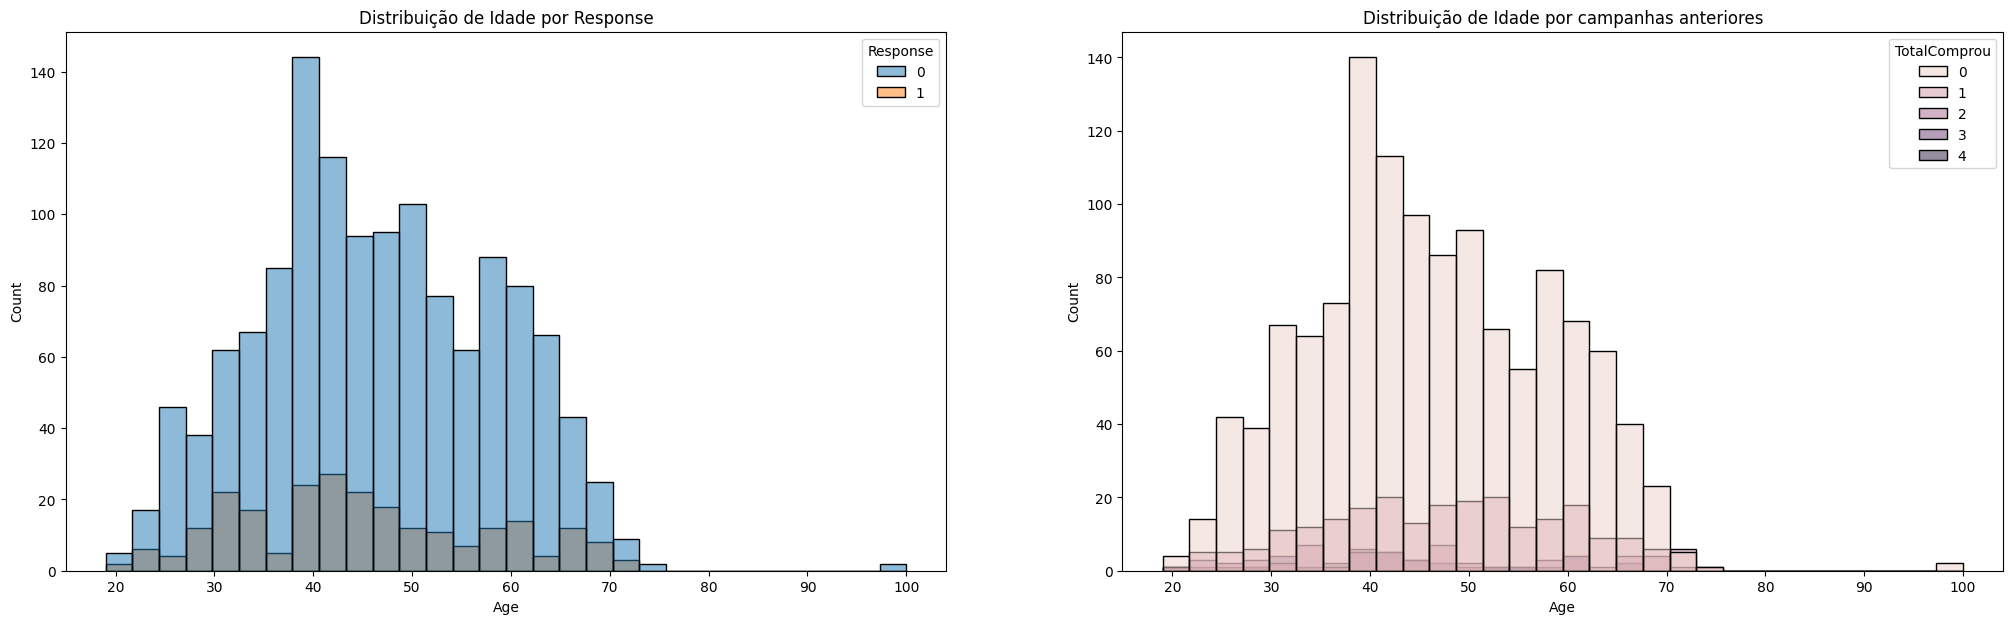

In [208]:
#visualizando a distribuição de idade de quem respondeu a campanha 
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Age', hue='Response', kde=False, bins=30)
plt.title('Distribuição de Idade por Response')
plt.subplot(1,2,2)
sns.histplot(data=df_train, x='Age', hue='TotalComprou', kde=False, bins=30)
plt.title('Distribuição de Idade por campanhas anteriores')
plt.show()

olhando a distribuição de idade de quem adquiriu o produto, a sua grande maioria se encontra entre 30 e 60 anos

In [209]:
"""# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
plt.figure(figsize=(20,10))
sns.heatmap(
    df_train.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True,
    fmt='.2f',
    vmin = -1,
    vmax = 1,
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(df_train.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()"""

"# Plotando a matriz de correlações usando um Heatmap para dar cor aos números\nplt.figure(figsize=(20,10))\nsns.heatmap(\n    df_train.corr(), #Fonte dos dados, nossa matriz de correlação\n    annot=True,\n    fmt='.2f',\n    vmin = -1,\n    vmax = 1,\n    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)\n    mask=np.triu( # Faz uma matriz triangular\n        np.ones_like(df_train.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação\n    ) # A máscara vai então 'apagar' a diagonal superior da matriz\n           )\nplt.show()"

##Pre-Processamento para modelagem

#### Outliers

In [210]:
df_train.describe(percentiles=[.25, .5, .75, .99])

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalComprou
count,1568.000000,1568.000000,1553.00000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.0,1568.0,1568.000000,1568.000000,1568.000000
mean,5575.101403,1968.730230,52011.51320,0.436224,0.514668,49.320791,311.213010,26.581633,168.948342,38.117985,...,0.077168,0.074617,0.066327,0.014668,0.008929,3.0,11.0,0.154337,46.246173,0.305485
std,3253.672370,12.091253,20631.97907,0.534468,0.546301,28.714887,339.708222,39.749258,224.406065,55.459438,...,0.266944,0.262857,0.248931,0.120260,0.094098,0.0,0.0,0.361386,11.966956,0.682853
min,0.000000,1893.000000,1730.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,19.000000,0.000000
25%,2824.500000,1959.000000,35860.00000,0.000000,0.000000,25.000000,26.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,38.000000,0.000000
50%,5363.000000,1970.000000,51983.00000,0.000000,0.000000,50.000000,184.000000,8.000000,68.500000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,0.000000
75%,8534.750000,1977.000000,69016.00000,1.000000,1.000000,74.000000,507.000000,33.250000,239.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,56.000000,0.000000
99%,11074.330000,1992.000000,93927.28000,2.000000,2.000000,98.000000,1291.300000,172.000000,915.000000,226.320000,...,1.000000,1.000000,1.000000,1.000000,0.000000,3.0,11.0,1.000000,70.330000,3.000000
max,11191.000000,1996.000000,94076.00000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,258.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,100.000000,4.000000


 - A feature **Income** possuia outliers porem eu ja tratei antes da analise exploratoria para melhorar na visualização dos graficos, optei por trunkar em percentil 99%
 - A Feature **Age** que eu criei apartir do ano de nascimento ficou com outliers, por hora optei por trunkar em 100 anos o percentil >99% porem, porem posso alterar isto para testes na etapa de modelagem.

#### Dados nulos


In [211]:
df_train.isnull().mean().sort_values(ascending=False)

Income                 0.009566
ID                     0.000000
NumWebPurchases        0.000000
Age                    0.000000
Response               0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumDealsPurchases      0.000000
Year_Birth             0.000000
MntGoldProds           0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
TotalComprou           0.000000
dtype: f

- só temos renda com poucos dados faltantes vou realizar a imputação pela Median() com base em nivel de educação.

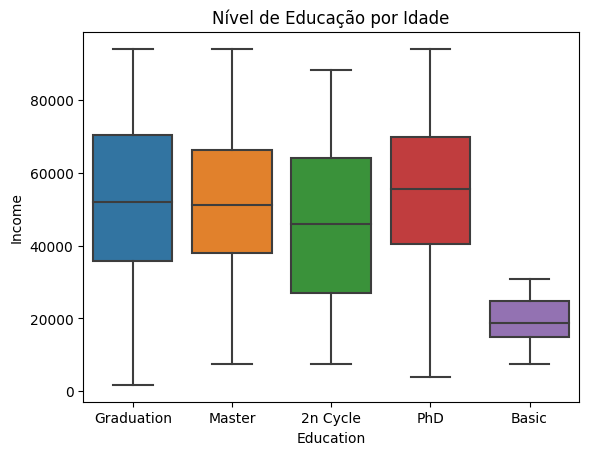

In [212]:

sns.boxplot(x='Education', y='Income', data=df_train)
plt.title('Nível de Educação por Idade')
plt.show()

In [213]:
#calculando a mediana de renda por nivel de educação 
median_income_by_education = df_train.groupby('Education')['Income'].median()

df_train['Income'] = df_train.apply(
    lambda row: median_income_by_education[row['Education']] if pd.isna(row['Income']) else row['Income'], 
    axis=1
)

- a função apply para aplicar a mediana correspondente a cada linha onde a renda é nula e manter o valor original quando não for nulo. Note que a condição pd.isna(row['Income']) verifica se o valor da renda é nulo.
- se achar necessario retorno aqui e aplico outra tecnica de imputação. 

#### Dropando colunas que não pretendo usar a principio 

In [214]:
copy_df_train = df_train.copy()

In [215]:
df_train = df_train.drop(['Year_Birth','Z_Revenue','Z_CostContact'],axis = 1)

- Estou removendo **year_birth** por que criei outra feature Age 
- **z_Revenue** e **Z_costContact**, não tenho informações sobre o que essas features representam e ambas possuem somente um unico valor então seram removidas também.

In [216]:
# Extraindo informações de data do Dt_Customer
df_train['Year'] = df_train['Dt_Customer'].dt.year
df_train['Month'] = df_train['Dt_Customer'].dt.month
df_train['Day'] = df_train['Dt_Customer'].dt.day


In [217]:
df_train = df_train.drop('Dt_Customer', axis = 1)

- Criei 3 features apartir da Dt_customer para poder usar na modelagem e por isto estou removendo a mesma 

#### Preparando os dados para modelagem baseline 

In [218]:
df_train = pd.get_dummies(df_train, columns=['Education','Marital_Status'], drop_first=True)

In [219]:
X = df_train.drop('Response', axis = 1)
y = df_train['Response']

In [220]:
X_train, X_val, y_train, y_val = train_test_split(X, y,  test_size =0.3,random_state = 1603)

In [221]:
X_train.shape, X_val.shape

((1097, 38), (471, 38))

Estou divindo o conjunto de treino em treino e validação para poder validar o que estou fazendo antes de aplicar no conjunto de teste.

## Baseline Model

In [222]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(random_state=1603)
     

rfc.fit(X_train, y_train)
y_pred_train_rfc_baseline = rfc.predict(X_val)
print(classification_report(y_val, y_pred_train_rfc_baseline))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       406
           1       0.67      0.28      0.39        65

    accuracy                           0.88       471
   macro avg       0.78      0.63      0.66       471
weighted avg       0.86      0.88      0.86       471



In [183]:
from scipy.special import boxcox1p
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']

for var in variables:
    df_train[var] = boxcox1p(df_train[var] + 1, 0.15)
